<a href="https://colab.research.google.com/github/Samikshha-K/EDA-DA/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Benefits.csv')

In [3]:
data.head()

,rownames,stateur,statemb,state,age,tenure,joblost,nwhite,school12,sex,bluecol,smsa,married,dkids,dykids,yrdispl,rr,head,ui
0,1,4.5,167,42,49,21,other,no,no,male,yes,yes,no,no,no,7,0.290631,yes,yes
1,2,10.5,251,55,26,2,slack_work,no,no,male,yes,yes,no,yes,yes,10,0.520202,yes,no
2,3,7.2,260,21,40,19,other,no,yes,female,yes,yes,yes,no,no,10,0.432490,yes,yes
3,4,5.8,245,56,51,17,slack_work,yes,no,female,yes,yes,yes,no,no,10,0.500000,no,yes
4,5,6.5,125,58,33,1,slack_work,no,yes,male,yes,yes,yes,yes,yes,4,0.390625,yes,no


Univariate Analysis

Text(0.5, 0, 'Make of the reason')

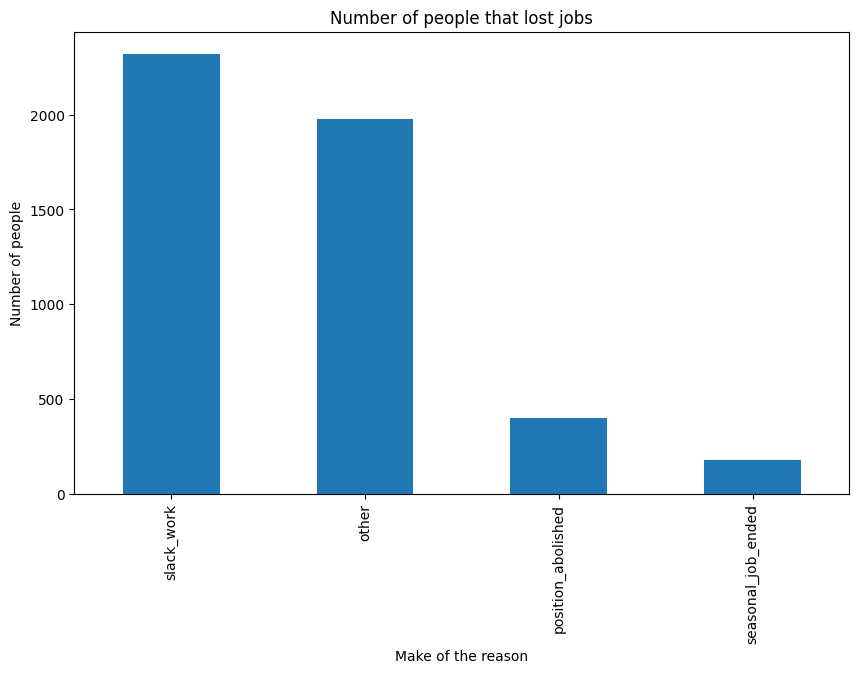

In [4]:
data.joblost.value_counts().nlargest(30).plot(kind='bar', figsize=(10,6))
plt.title("Number of people that lost jobs")
plt.ylabel('Number of people')
plt.xlabel('Make of the reason')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


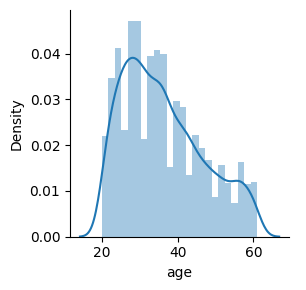

In [5]:
sns.FacetGrid(data).map(sns.distplot,"age").add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


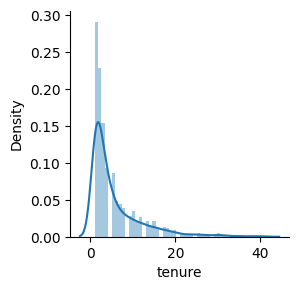

In [6]:
sns.FacetGrid(data).map(sns.distplot,"tenure").add_legend()

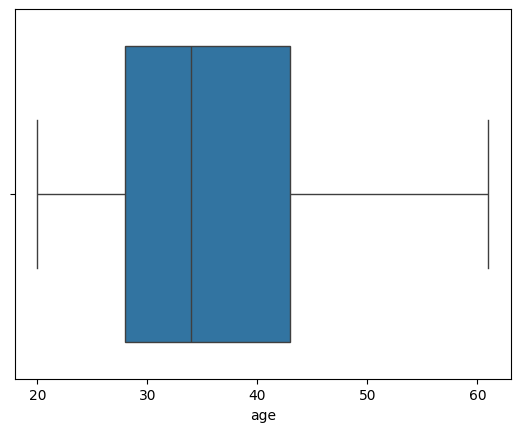

In [7]:
sns.boxplot(x="age",data=data)
plt.show()

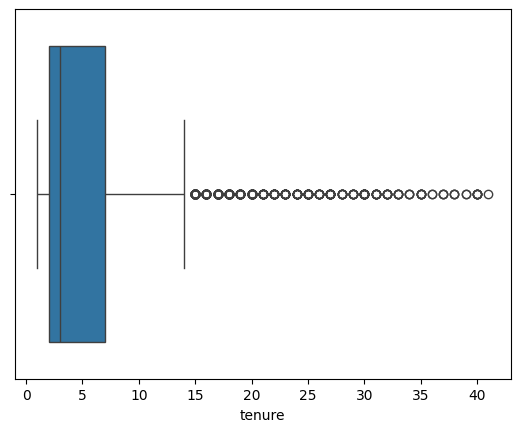

In [8]:
sns.boxplot(x="tenure",data=data)
plt.show()

Bivariate Analysis

Text(0, 0.5, 'stateur')

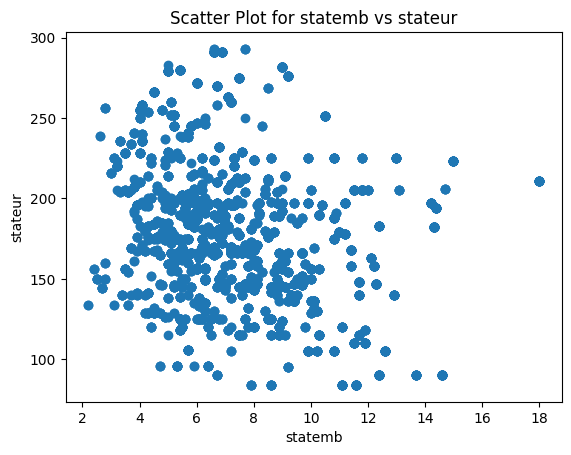

In [11]:
plt.scatter(data["stateur"], data["statemb"])
plt.title("Scatter Plot for statemb vs stateur")
plt.xlabel("statemb")
plt.ylabel("stateur")

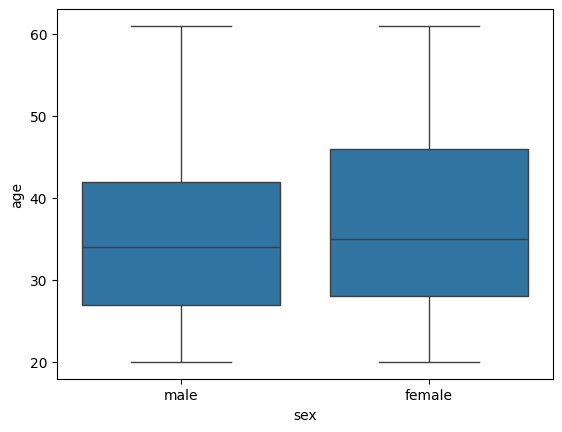

In [12]:
sns.boxplot(x="sex",y="age",data=data)
plt.show()

Multivariate Analysis

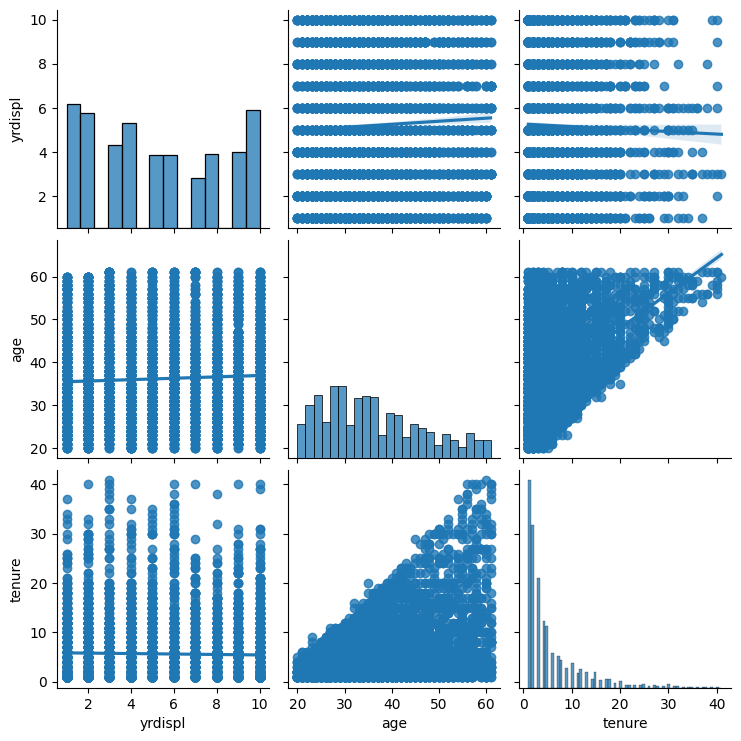

In [14]:
sns.pairplot(data,vars = ['yrdispl', 'age','tenure'], kind="reg")
plt.show()

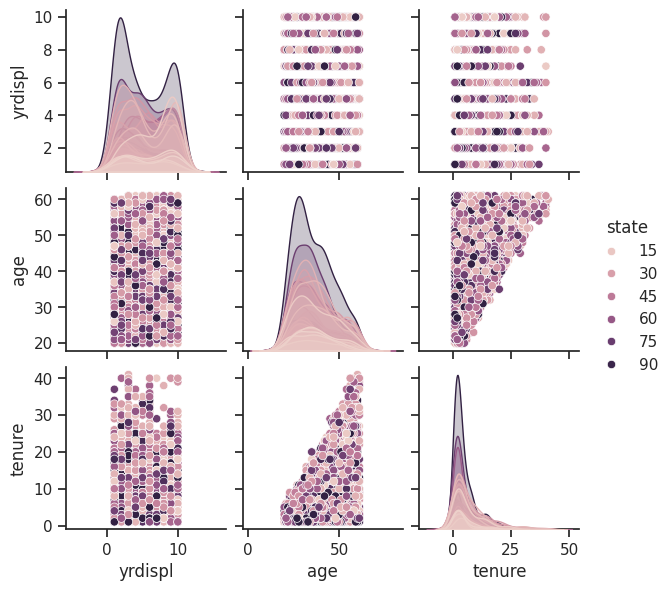

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,height=2,vars = ['yrdispl', 'age','tenure'], hue="state")
plt.show()

In [20]:
from scipy import stats

corr = stats.pearsonr(data["age"], data["tenure"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 3.379297929506809e-288
cor:		 0.48645263788781945


In [22]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,rownames,stateur,statemb,state,age,tenure,yrdispl,rr
rownames,1.000000,0.038567,-0.048954,-0.011454,-0.001671,0.012278,-0.079291,0.014312
stateur,0.038567,1.000000,-0.242386,0.129843,-0.035420,0.022494,-0.524923,-0.086565
statemb,-0.048954,-0.242386,1.000000,-0.186118,0.021088,0.008032,0.607808,0.270023
state,-0.011454,0.129843,-0.186118,1.000000,-0.050537,-0.107097,-0.065680,-0.188103
age,-0.001671,-0.035420,0.021088,-0.050537,1.000000,0.486453,0.047242,-0.125424
tenure,0.012278,0.022494,0.008032,-0.107097,0.486453,1.000000,-0.023060,-0.145108
yrdispl,-0.079291,-0.524923,0.607808,-0.065680,0.047242,-0.023060,1.000000,0.072308
rr,0.014312,-0.086565,0.270023,-0.188103,-0.125424,-0.145108,0.072308,1.000000


<Axes: >

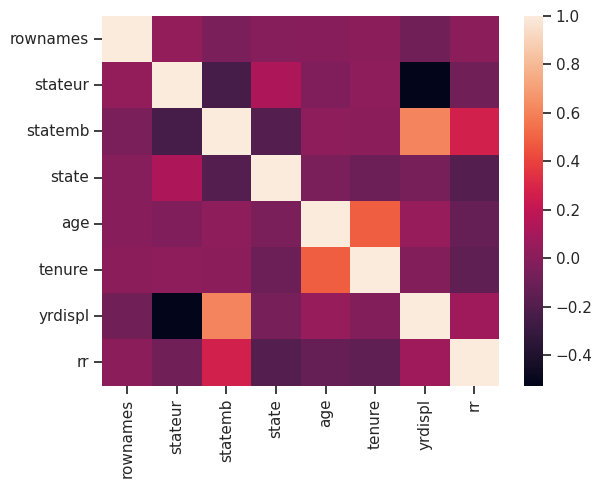

In [23]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)